In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
  plt.figure(figsize=(10, 6))
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")

  if label: 
    plt.legend(fontsize=14, labels=label)

  plt.grid(True)
  plt.show

<h2>Trend</h2>

In [3]:
def trend(time, slope=0):

  series = time *slope

  return series

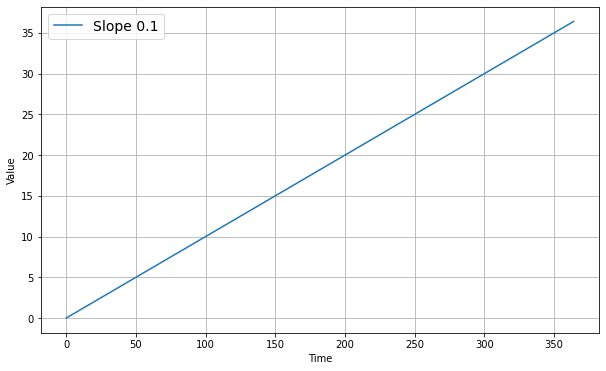

In [4]:
#Generate Time steps. Assume 1 per day

time = np.arange(365)

slope=0.1

series = trend(time, 0.1)

plot_series(time, series, label=["Slope {}".format(slope)])


<h2>Seasonality</h2>

In [5]:
def seasonal_pattern(season_time):

  data_pattern = np.where(season_time < 0.4, np.cos(season_time*2*np.pi), 1/np.exp(3*season_time))
  #                             condition                if the condition does not happen
  return data_pattern 

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase)%period) / period 

  data_pattern = amplitude * seasonal_pattern(season_time)

  return data_pattern               

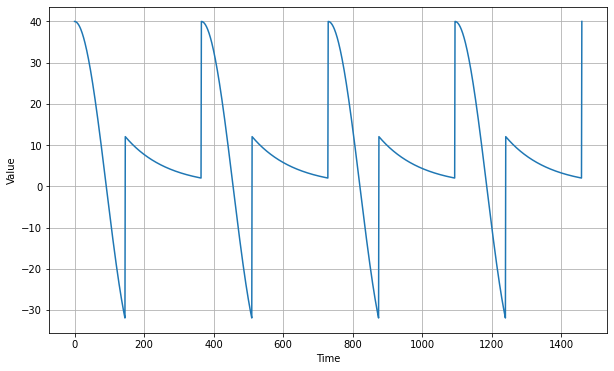

In [6]:
time = np.arange(4 * 365 + 1)

period = 365 

aplitude = 40 

series = seasonality(time, period= period, amplitude=aplitude)
plot_series(time, series)

<h2>Noise</h2>

In [7]:
def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)

  noise = rnd.randn(len(time)) * noise_level 

  return noise 

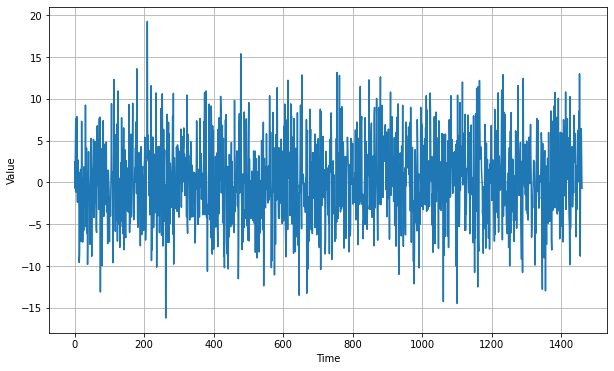

In [8]:
noise_level = 5 

noise_signal = noise(time, noise_level = noise_level, seed=42)

plot_series(time, noise_signal)

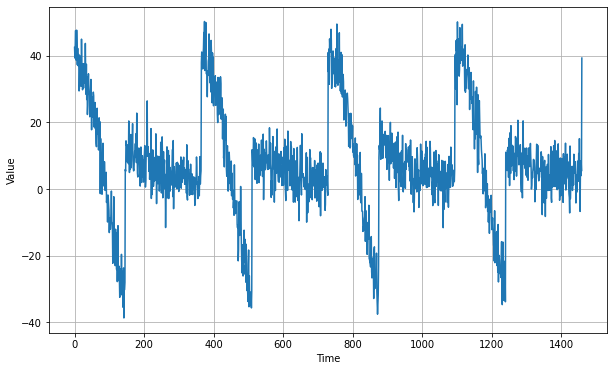

In [9]:
series += noise_signal

plot_series(time, series)

<h2>Autocorrelation</h2>

In [10]:
def autocorrelation(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)

  ar = rnd.randn(len(time)+50)

  #set first 50 elements to a constant 

  ar[:50] = 100 

  phi1 = 0.5 
  phi2 = -0.1 

  for step in range(50, len(time)+50):
    ar[step] += phi1 * ar[step-50]
    ar[step] += phi2 * ar[step-33]


  ar = ar[50:] * amplitude

  return ar

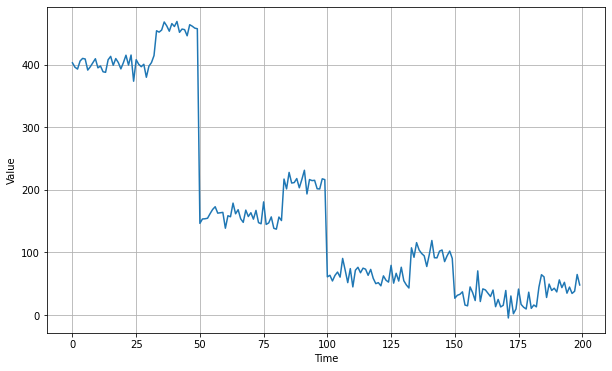

In [11]:
series = autocorrelation(time, amplitude=10, seed=42)

plot_series(time[:200], series[:200])



In [12]:
def autocorrelation(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)

  ar = rnd.randn(len(time)+1)

  phi1 = 0.8 


  for step in range(1, len(time)+1):
    ar[step] += phi1 * ar[step-1]
  


  ar = ar[1:] * amplitude

  return ar

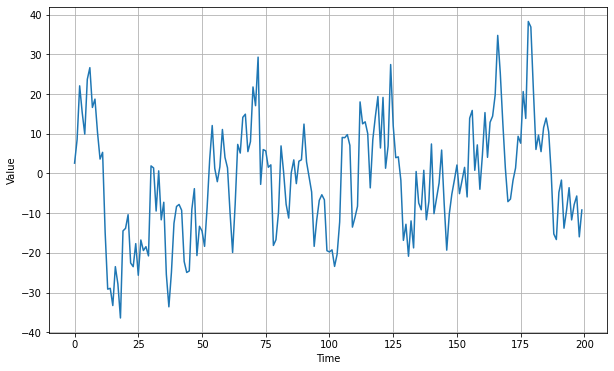

In [13]:
series = autocorrelation(time, amplitude=10, seed=42)

plot_series(time[:200], series[:200])

In [14]:
def impulses(time, num_impulses, amplitude=1, seed=None):

  rnd = np.random.RandomState(seed)

  impulse_indices=rnd.randint(len(time), size=num_impulses) 

  series = np.zeros(len(time))

  for index in impulse_indices: 
    series[index] += rnd.rand() * amplitude

  return series 

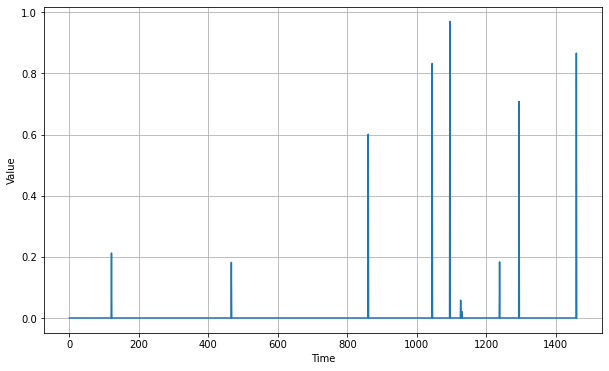

In [15]:
impulses_signal = impulses(time, num_impulses=10, seed=42)
plot_series(time, impulses_signal)

In [16]:
def autocorrelation_impulses(source, phis):

  ar = source.copy()

  for step, value in enumerate(source):
    for lag, phi in phis.items():

      if step - lag > 0:
        ar[step] += phi * ar[step - lag]

  return ar

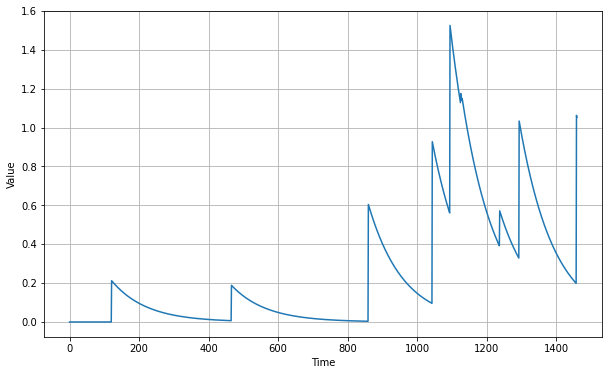

In [17]:
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

plot_series(time, series)

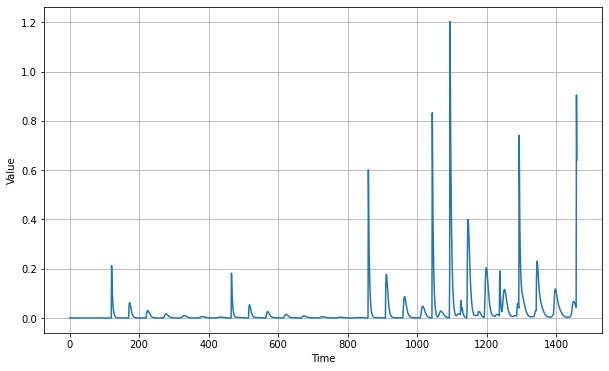

In [18]:
series = autocorrelation_impulses(impulses_signal, {1:0.70, 50:0.2})

plot_series(time, series)

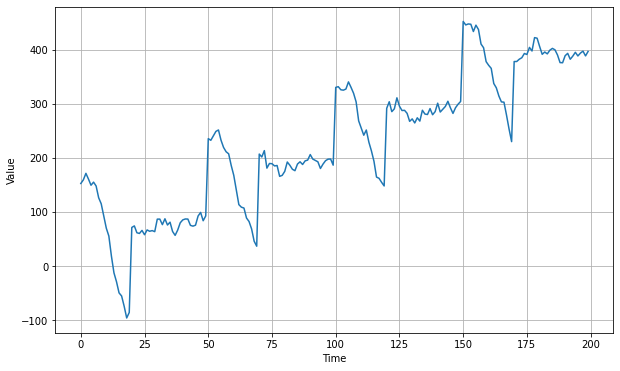

In [19]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150)+ trend(time, 2)

plot_series(time[:200], series[:200])

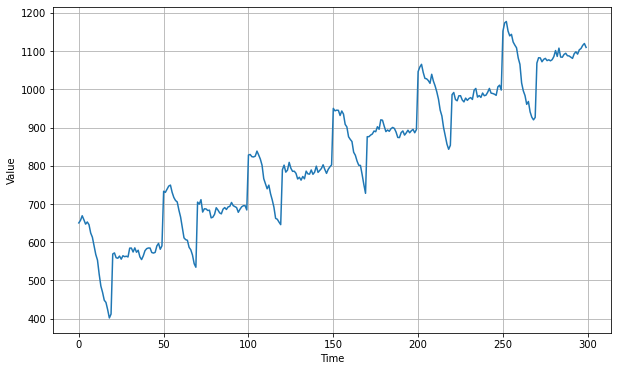

In [20]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150)+ trend(time, 2)

series2 = series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150)+ trend(time-1, 2) + 500

series[200:] = series2[200:]

plot_series(time[:300], series[:300])

